In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## MLRM
#### Weather dataset
#### Importing dataset

Since data is in form of csv file we have to use pandas read_csv to load the data

Check to see if there are any null values. If it's present, you can do the following:

In sklearn, data is imputed using the Imputation method.

The fillna() method is used to fill NaN values with the mean, median, and mode.

Describe data so that statistical analysis can be performed.

In [2]:
weather=pd.read_csv("weatherHistory.csv")
weather.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
type(weather['Formatted Date'])


pandas.core.series.Series

In [4]:
df=weather.copy()
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
#checking missing values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## Checking for outliers
### M-1: Boxplot
### M-2: Z_score
### M-3: IQR
steps:
Sort the dataset in ascending order.
calculate the 1st and 3rd quartiles(Q1, Q3).
compute IQR=Q3-Q1.
compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6a9698700>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6a9698dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6a96983a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6a9d404c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6a9d40820>],
 'means': []}

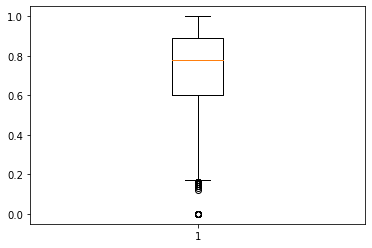

In [6]:

plt.boxplot(df['Humidity'])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

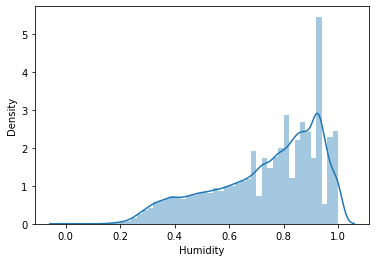

In [7]:
sns.distplot(df['Humidity'])

In [8]:
#sns.regplot(x=df["Temperature (C)"], y=df["Humidity"])

 Since the column Humidity of weather dataframe is not normally distributed, it is left skewed

In [9]:
df.Humidity.describe()

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

#### Method 1: to identify the outliers , if distribution is not gaussian distribution

In [10]:
#We will do with IQR
IQR= df.Humidity.quantile(0.75)-df.Humidity.quantile(0.25)
IQR

0.29000000000000004

In [11]:
Upper_bound= df.Humidity.quantile(0.75)+(1.5*IQR)
lower_bound= df.Humidity.quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

1.3250000000000002
0.16499999999999992


(None, None)


z_score = (Xi-mean)/std
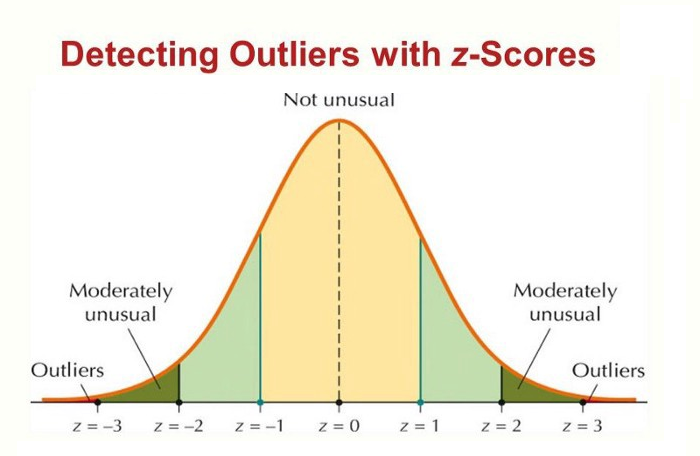


 #### Method-: 2: TO identify the outliers:
 If it is Gaussian Distribution!
 


In [12]:
#Lets check with std
u_b=df['Humidity'].mean()+3*df['Humidity'].std()
l_b=df['Humidity'].mean()-3*df['Humidity'].std()
print(u_b), print(l_b)

1.3213171835375705
0.14848074913421072


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6a9fad850>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6a9fadf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6a9fad4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6a9fbb610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6a9fbb970>],
 'means': []}

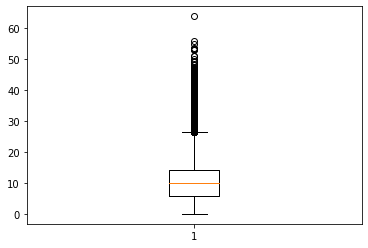

In [13]:
plt.boxplot(df['Wind Speed (km/h)'])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Density'>

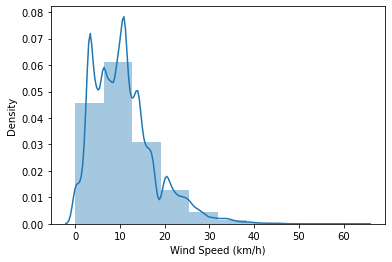

In [14]:
sns.distplot(df['Wind Speed (km/h)'], bins=10)

In [15]:
df['Wind Speed (km/h)'].describe()

count    96453.000000
mean        10.810640
std          6.913571
min          0.000000
25%          5.828200
50%          9.965900
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64

In [16]:
#We will do with IQR
IQR= df['Wind Speed (km/h)'].quantile(0.75)-df['Wind Speed (km/h)'].quantile(0.25)
Upper_bound= df['Wind Speed (km/h)'].quantile(0.75)+(1.5*IQR)
lower_bound= df['Wind Speed (km/h)'].quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

26.597199999999997
-6.633199999999997


(None, None)

In [17]:
#Extreme boundries 
IQR= df['Wind Speed (km/h)'].quantile(0.75)-df['Wind Speed (km/h)'].quantile(0.25)
Upper_bound= df['Wind Speed (km/h)'].quantile(0.75)+(3*IQR)
lower_bound= df['Wind Speed (km/h)'].quantile(0.25)-(3*IQR)
print(Upper_bound),print(lower_bound)

39.0586
-19.094599999999993


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ab670a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab67d130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ab6706a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab67d7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab67db50>],
 'means': []}

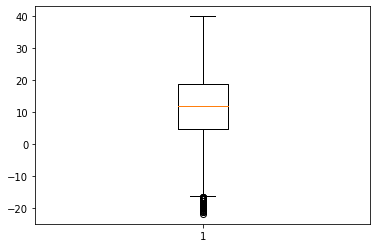

In [18]:
plt.boxplot(df['Temperature (C)'])

In [19]:
df['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

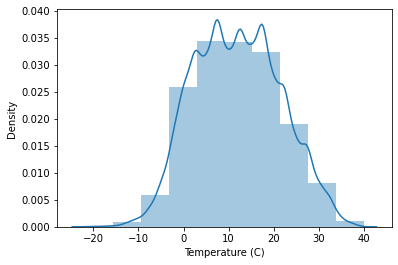

In [20]:
sns.distplot(df['Temperature (C)'], bins=10)

In [21]:
u_b=df['Temperature (C)'].mean()+3*df['Temperature (C)'].std()
l_b=df['Temperature (C)'].mean()-3*df['Temperature (C)'].std()
print(u_b), print(l_b)

40.587317399482636
-16.7219605244589


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ab7547f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab754eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ab754490>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab7615b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab761910>],
 'means': []}

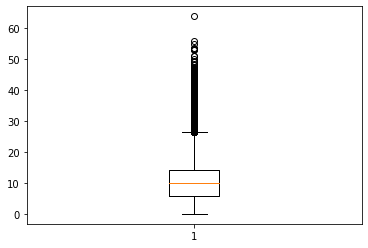

In [22]:
plt.boxplot(df['Wind Speed (km/h)'])

In [23]:
u_b=df['Wind Speed (km/h)'].mean()+3*df['Wind Speed (km/h)'].std()
l_b=df['Wind Speed (km/h)'].mean()-3*df['Wind Speed (km/h)'].std()
print(u_b), print(l_b)

31.551353178569663
-9.930072896983248


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ab7c2490>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab7c2b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ab7c2130>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab7cd250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab7cd5b0>],
 'means': []}

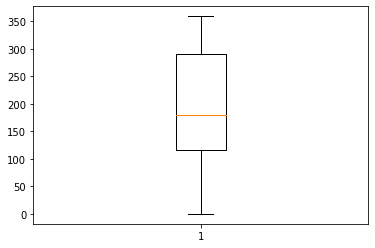

In [24]:
plt.boxplot(df['Wind Bearing (degrees)'])

#Not found

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6aa67eb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab663c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6aa67e850>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab6acbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab6aceb0>],
 'means': []}

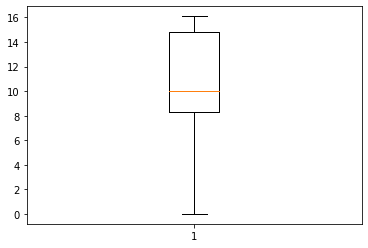

In [25]:
plt.boxplot(df['Visibility (km)'])
#Not found

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ab871250>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab871910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ab7fceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab871fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab87d370>],
 'means': []}

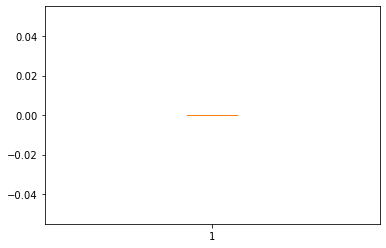

In [26]:
plt.boxplot(df['Loud Cover'])

#not found Useless column

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ab8cd370>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab8cda30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ab8bffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab8d8130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab8d8490>],
 'means': []}

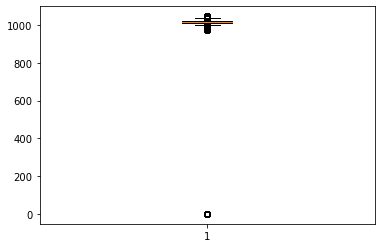

In [27]:
plt.boxplot(df['Pressure (millibars)'])

In [28]:
df['Pressure (millibars)'].describe()

count    96453.000000
mean      1003.235956
std        116.969906
min          0.000000
25%       1011.900000
50%       1016.450000
75%       1021.090000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [29]:
u_b=df['Pressure (millibars)'].mean()+3*df['Pressure (millibars)'].std()
l_b=df['Pressure (millibars)'].mean()-3*df['Pressure (millibars)'].std()
print(u_b), print(l_b)

1354.145672901905
652.3262388064162


(None, None)

### Replace the outliers

In [30]:
df.loc[df["Humidity"]<0.165,"Humidity"]=0.165

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ab929c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab934310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ab9298b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab9349d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab934d30>],
 'means': []}

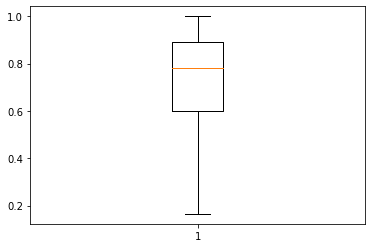

In [31]:
plt.boxplot(df.Humidity)

In [32]:
#sns.regplot(x=df["Temperature (C)"], y=df["Humidity"])

In [33]:
df.loc[df["Wind Speed (km/h)"]>26.5,"Wind Speed (km/h)"]=26.5

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ab98f100>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ab98f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ab980d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ab98fe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ab99a220>],
 'means': []}

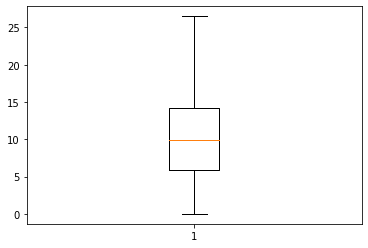

In [34]:
plt.boxplot(df["Wind Speed (km/h)"])

In [35]:

df.loc[df["Pressure (millibars)"]<652.4,"Pressure (millibars)"]=652.4

In [36]:
# checking for missing values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [37]:
# checking unique data in categorical feature
df['Precip Type'].unique()


array(['rain', 'snow', nan], dtype=object)

In [38]:
All=df.describe(include='all')# describes allnumerical and  categorical data
Cat=df.describe(include=['O'])# describes all  categorical data



In [39]:
# impute missing value 
df['Precip Type'].fillna(df['Precip Type'].mode()[0],inplace=True)


In [40]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

## We will do Feature Engineering

From description we can see that Formatted Date is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require  pd.to_datetime to convert object data type to datetime dtype.

.dt.month method will extract only month of that date

In [41]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [42]:
# convert culumn into datetime
import datetime
df["Formatted Date"]=pd.to_datetime(df["Formatted Date"],utc=True)
#Extract month from date column
df['month']=df['Formatted Date'].dt.month
print(df['month'])

0        3
1        3
2        4
3        4
4        4
        ..
96448    9
96449    9
96450    9
96451    9
96452    9
Name: month, Length: 96453, dtype: int64


In [43]:
#Here we are droing the useless columns
df.drop(["Formatted Date","Loud Cover","Daily Summary"],axis=1,inplace=True) 
#Loud cover has constant feature 
#and daily summary column has too many unique values and from date fomrmatted alredy extracted months

In [44]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4


In [45]:
df.Summary.unique()
df.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

In [46]:
#import library
#FOr the column Summary which is----> ordinal
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder=LabelEncoder()
df["Summary"]=label_encoder.fit_transform(df['Summary'])
df["Summary"].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [47]:
df["Precip Type"]=label_encoder.fit_transform(df['Precip Type'])
df["Precip Type"].unique()

array([0, 1])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  int32  
 1   Precip Type               96453 non-null  int32  
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   month                     96453 non-null  int64  
dtypes: float64(7), int32(2), int64(1)
memory usage: 6.6 MB


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap

2. feature_importance_

3. SelectKBest

In [49]:
# we have to create independent and dependent variables 
x=df.drop(["Temperature (C)"],axis=1) #Independent features
y=df["Temperature (C)"]  #dependent variables 


In [50]:
df.corr()



,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
Summary,1.000000,-0.115673,0.146658,0.142760,-0.113311,0.041052,0.022789,0.140138,0.126415,-0.030341
Precip Type,-0.115673,1.000000,-0.562620,-0.565207,0.232786,-0.070080,-0.041984,-0.312875,0.043474,-0.146497
Temperature (C),0.146658,-0.562620,1.000000,0.992629,-0.633179,0.015524,0.029988,0.392847,-0.041287,0.148576
Apparent Temperature (C),0.142760,-0.565207,0.992629,1.000000,-0.603478,-0.050811,0.029031,0.381718,-0.033568,0.157986
Humidity,-0.113311,0.232786,-0.633179,-0.603478,1.000000,-0.230628,0.000591,-0.369600,0.010006,0.056384
Wind Speed (km/h),0.041052,-0.070080,0.015524,-0.050811,-0.230628,1.000000,0.099943,0.105185,-0.075718,-0.097379
Wind Bearing (degrees),0.022789,-0.041984,0.029988,0.029031,0.000591,0.099943,1.000000,0.047594,-0.020593,-0.019208
Visibility (km),0.140138,-0.312875,0.392847,0.381718,-0.369600,0.105185,0.047594,1.000000,0.039725,-0.071946
Pressure (millibars),0.126415,0.043474,-0.041287,-0.033568,0.010006,-0.075718,-0.020593,0.039725,1.000000,-0.005768
month,-0.030341,-0.146497,0.148576,0.157986,0.056384,-0.097379,-0.019208,-0.071946,-0.005768,1.000000


<AxesSubplot:>

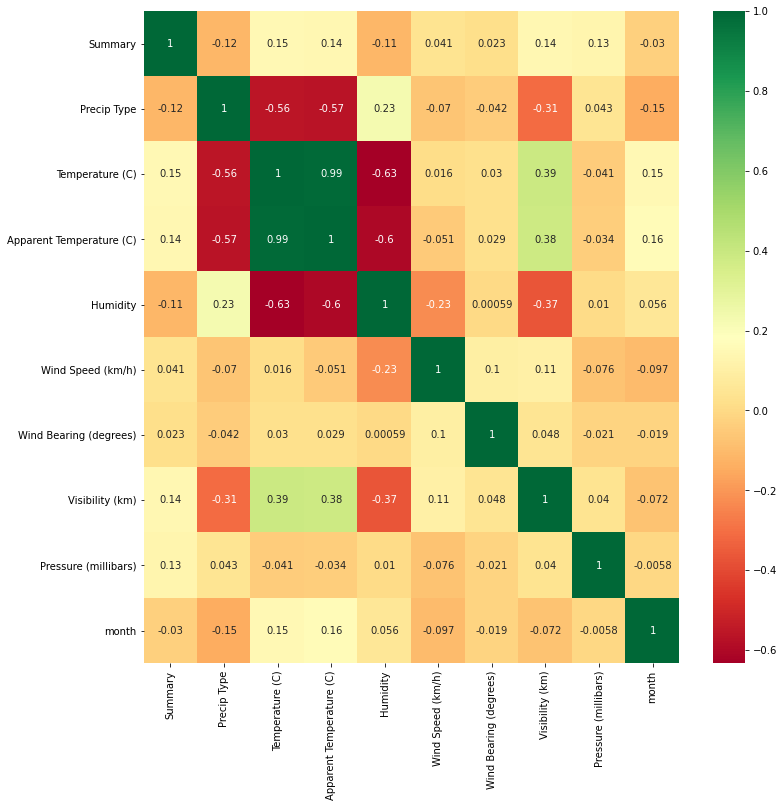

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [52]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4


In [53]:
##Removing correlated features
Threshold=0.9 

In [54]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
correlation(x,Threshold)

set()

##### Feature_importance_

In [56]:
#Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [57]:
print(selection.feature_importances_)

[4.52366567e-05 2.29319606e-01 6.85646891e-01 5.46436602e-02
 6.41009120e-03 1.85205565e-05 3.99622574e-03 4.20772361e-05
 1.98776919e-02]


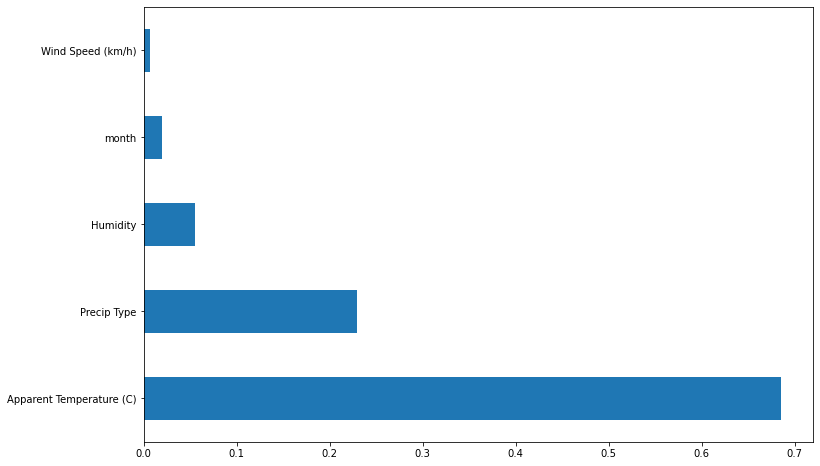

In [75]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

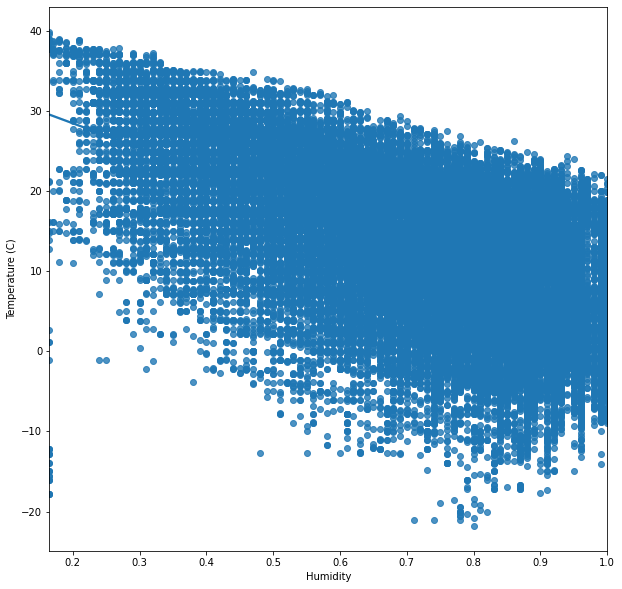

In [80]:
# plotting a scatter plot between temp and humdity ---> to see effect of Humidity on Temperature
plt.figure(figsize=(10,10))
sns.regplot(df["Humidity"],df["Temperature (C)"])

## Fitting model using Linear Regression

1. Split dataset into train and test set in order to prediction w.r.t x_test
2. Feature scalling----->StandardScaler
3. Import model
4. Fit the data
5. Predict w.r.t X_test
4. In regression check RSME Score
5. Plot graph

In [59]:
# split the data in train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Feature scaling 
##### Standardization(Why standardization?)

Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [60]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4


As we can see the above table, we could say that there is range difference between our numerical features, we need to do feature scalling before building the machine learning regression model

In [61]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
### fit vs fit_transform
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled

array([[ 0.68653792, -0.35398035, -0.39885987, ..., -0.08857545,
         0.36434935,  1.01299679],
       [ 0.22745434, -0.35398035,  1.11453747, ...,  0.20341406,
         0.16077934,  0.14266423],
       [-0.92025462, -0.35398035, -1.42994292, ..., -2.01724302,
        -0.23963904,  1.30310764],
       ...,
       [ 0.22745434, -0.35398035,  0.25426324, ..., -0.07704955,
         0.06259522,  1.01299679],
       [ 0.45699613, -0.35398035,  0.63378072, ..., -0.79165546,
        -0.34166411,  0.72288593],
       [ 0.22745434, -0.35398035,  0.27814532, ...,  1.24074522,
        -0.22427527,  1.30310764]])

In [63]:
#Transform on x_test
x_test_scaled=scaler.transform(x_test)
x_test_scaled

array([[ 0.22745434, -0.35398035,  0.33317795, ...,  1.30605867,
         0.02418578, -0.43755748],
       [ 0.22745434, -0.35398035,  0.12135424, ...,  0.21878193,
         0.21575285,  1.01299679],
       [ 0.22745434, -0.35398035,  1.22460273, ..., -0.08857545,
         0.15021674,  0.43277508],
       ...,
       [-0.92025462, -0.35398035, -0.63819989, ..., -2.06718859,
        -0.1544181 , -1.30789004],
       [-0.92025462, -0.35398035, -1.07378835, ..., -1.94424564,
         0.11108713,  1.5932185 ],
       [-2.29750536, -0.35398035,  0.47024035, ...,  1.09859244,
         0.17110188,  0.14266423]])

#### Build the Linear Regression Model

In [64]:
# import library
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

#### Predict the model 

In [65]:
y_pred=reg.predict(x_test_scaled)


In [66]:
#RMSE error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.9417573946566135


In [67]:
#R^2 error
print(reg.score(x_test_scaled,y_test))
print(reg.score(x_train_scaled,y_train))

0.9902685532590041
0.9902096730875599


C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


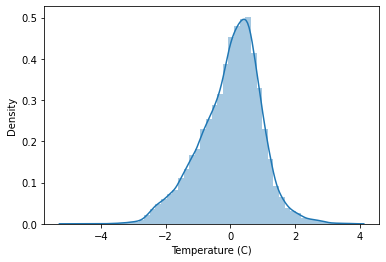

In [68]:
sns.distplot(y_test-y_pred)
plt.show()

We can see above graph of error=(y_test-y_pred), which is normal distributed 

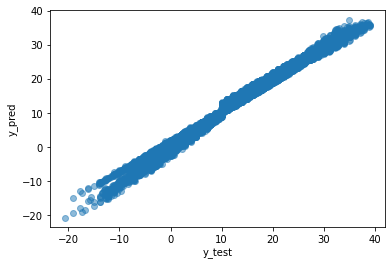

In [69]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Statistical Model

In [70]:
# Import library
import statsmodels.api as sm

#adding constant term
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [71]:
# converting into dataframe
x_train_d=pd.DataFrame(x_train)

### Building the stats model

In [72]:
model_train=sm.OLS(y_train,x_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.586e+05
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:57:36   Log-Likelihood:                -92004.
No. Observations:               67517   AIC:                         1.840e+05
Df Residuals:                   67507   BIC:                         1.841e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.4323      0.095     36.247      0.000       3.247       3.618
Summary                      0.0034      0.001      3.933      0.000       0.002       0.005
Precip Type                  0.0792      0.015      5.388      0.000       0.050       0.108
Apparent Temperature (C)     0.8729      0.001   1590.584      0.000       0.872       0.874
Humidity                    -1.3834      0.026    -53.013      0.000      -1.435      -1.332
Wind Speed (km/h)            0.0869      0.001    141.094      0.000       0.086       0.088
Wind Bearing (degrees)      -0.0004   3.42e-05    -11.281      0.000      -0.000      -0.000
Visibility (km)              0.0098      0.001     10.017      0.000       0.008       0.012
Pressure (millibars)        -0.0010   8.87e-05    -11.381      0.000      -0.001      -0.001
month                        0.0065      0.001      5.943      0.000       0.004       0.009
==============================================================================
Omnibus:                     2026.191   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2302.045
Skew:                          -0.403   Prob(JB):                         0.00
Kurtosis:                       3.412   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#checking for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(x_train_d.values, j) for j in range(x_train_d.shape[1])]
vif["features"] = x_train_d.columns
vif.round(1)

,VIF Factor,features
0,677.4,const
1,1.0,Summary
2,1.6,Precip Type
3,2.6,Apparent Temperature (C)
4,2.0,Humidity
5,1.2,Wind Speed (km/h)
6,1.0,Wind Bearing (degrees)
7,1.3,Visibility (km)
8,1.0,Pressure (millibars)
9,1.1,month


In [74]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4
